In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tfs
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [24]:
df = pd.read_csv('fashion-mnist_train.csv')
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
x = df.drop("label",axis=1).values
y = df["label"].values
x
y


array([2, 9, 6, ..., 8, 8, 7], dtype=int64)

In [31]:
x = x/ 255.0
x = x.reshape(-1,28,28)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [33]:
class_names = ["t-shirt","Trouser","Pullover", "Dress", "Coat", "Sandal","Shirt", "Sneaker", "Bag", "Ankle Boot"]

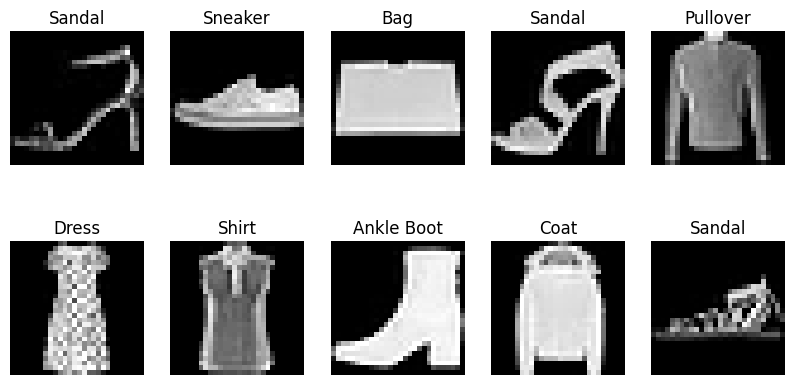

In [35]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

In [39]:
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\akash\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [41]:
model.fit(x_train,y_train,epochs=15, validation_split=0.1)

Epoch 1/15
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5290 - loss: 1.3711 - val_accuracy: 0.7606 - val_loss: 0.6685
Epoch 2/15
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7615 - loss: 0.6463 - val_accuracy: 0.7879 - val_loss: 0.5916
Epoch 3/15
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7948 - loss: 0.5688 - val_accuracy: 0.8112 - val_loss: 0.5324
Epoch 4/15
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8128 - loss: 0.5169 - val_accuracy: 0.8235 - val_loss: 0.5059
Epoch 5/15
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8261 - loss: 0.4867 - val_accuracy: 0.8238 - val_loss: 0.4929
Epoch 6/15
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8319 - loss: 0.4714 - val_accuracy: 0.8335 - val_loss: 0.4678
Epoch 7/15
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8356 - loss: 0.4533 - val_accuracy: 0.8473 - val_loss: 0.4387
Epoch 8/15
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8399 - loss: 0.4446 - 

In [43]:
loss,acc = model.evaluate(x_test,y_test)
print(f"Test Accuracy: {acc:.4f}")

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8649 - loss: 0.3715
Test Accuracy: 0.8594


In [44]:
predictions = model.predict(x_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


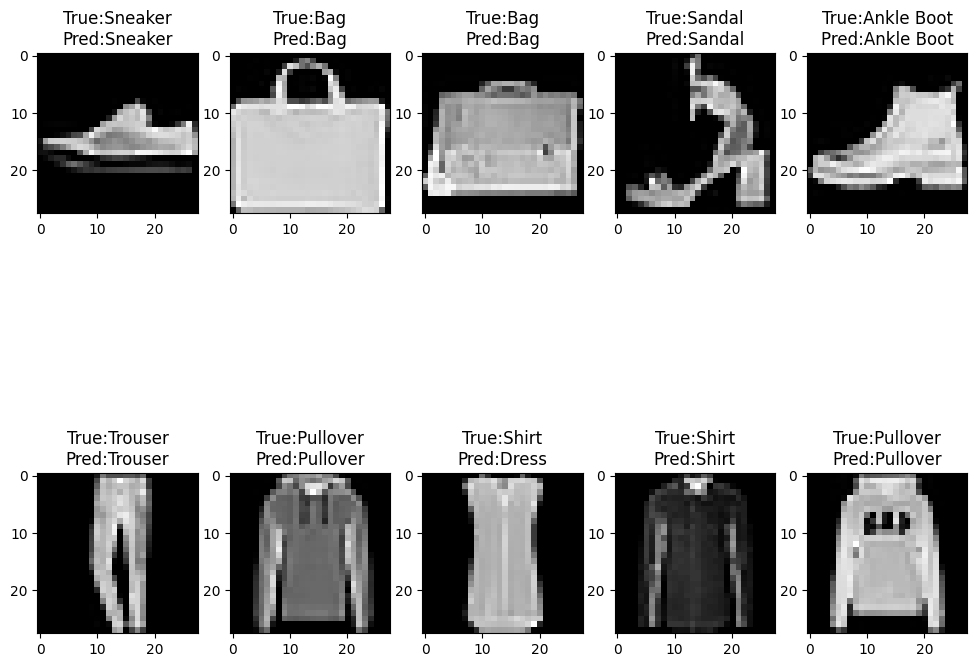

In [45]:
plt.figure(figsize=(12,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True:{class_names[y_test[i]]}\nPred:{class_names[np.argmax(predictions[i])]}")